 编写实现二值形态学：腐蚀、膨胀、开、闭、击中击不中，这五种基本运算的函数。要求待处理二值
图像和形态学结构元作为函数的输入参数，输出为处理后的结果图像

In [11]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
def binarize_image(image, threshold=128):
    """
    将图像转为二值图像
    :param image: PIL图像对象
    :param threshold: 二值化阈值
    :return: 二值化后的图像
    """
    
    image = image.convert('L')  # 转为灰度图
    binary_image = np.zeros_like(image)
    binary_image = np.array(image) > threshold  # 二值化
    return binary_image.astype('bool')

def apply_structuring_element(binary_image, structuring_element, operation='dilation'):
    """
    对二值图像应用结构元，进行膨胀或腐蚀操作
    :param binary_image: 二值图像
    :param structuring_element: 结构元
    :param operation: 'dilation'膨胀 或 'erosion'腐蚀
    :return: 处理后的二值图像
    """
    output_image = np.zeros_like(binary_image)
    se_center = (structuring_element.shape[0] // 2, structuring_element.shape[1] // 2)
    rows, cols = binary_image.shape
    
    for i in range(se_center[0], rows - se_center[0]):
        for j in range(se_center[1], cols - se_center[1]):
            region = binary_image[i - se_center[0]:i + se_center[0] + 1, j - se_center[1]:j + se_center[1] + 1]
            if operation == 'dilation':
                output_image[i, j] = np.any(region & structuring_element)
            elif operation == 'erosion':
                output_image[i, j] = np.all(region | ~structuring_element)
    
    return np.array(output_image).astype('bool')

# 膨胀操作
def dilate(binary_image, structuring_element, times=1):
    # 对二值图像进行膨胀操作
    for i in range(times):
        binary_image = apply_structuring_element(binary_image, structuring_element, 'dilation')
    return binary_image

# 腐蚀操作
def erode(binary_image, structuring_element, times=1):
    for i in range(times):
        binary_image = apply_structuring_element(binary_image, structuring_element, 'erosion')
    return binary_image

# 形态学开运算
def open_image(binary_image, structuring_element, times = 1):
    # 先腐蚀后膨胀
    eroded_image = erode(binary_image, structuring_element, times=times)
    dilate_image = dilate(eroded_image, structuring_element, times=times)
    return dilate_image

# 形态学闭运算
def close_image(binary_image, structuring_element, times = 1):
    # 先膨胀后腐蚀
    dilate_image = dilate(binary_image, structuring_element, times=times)
    eroded_image = erode(dilate_image, structuring_element, times=times)
    return eroded_image

# 击中击不中操作
def hit_or_miss(binary_image, structuring_element1, structuring_element2, times=1):
    """
    实现击中击不中操作
    :param binary_image: 二值图像
    :param structuring_element1: 击中部分的结构元
    :param structuring_element2: 击不中部分的结构元
    :return: 击中击不中后的二值图像
    """
    hit = erode(binary_image, structuring_element1, times=times)
    miss = erode(~binary_image, structuring_element2, times=times)
    # hit 与 miss 异或操作
    # return hit ^ miss
    return hit & ~miss

# 将numpy数组转为PIL图像
def to_pil_image(binary_image: np.array )-> Image:
    """
    将二值numpy数组转回PIL图像
    """
    return Image.fromarray((binary_image * 255).astype(np.uint8))

In [13]:
# 测试
root_path = '/root/DIVP_project/'
image_path_blocks = "project03/images/blocks.tif"
image_path_rectangle = "project03/images/noisy_rectangle.tif"
image_path_finger = "project03/images/noisy_fingerprint.tif"
image_path_penny = "project03/images/licolnfrompenny.tif"
image_path_region = "project03/images/region-filling-reflections.tif"

In [14]:
# 读取图像
image_blocks = Image.open(root_path + image_path_blocks)
image_rectangle = Image.open(root_path + image_path_rectangle)
image_rectangle = image_rectangle.resize((400, 400))
image_finger = Image.open(root_path + image_path_finger)
image_penny = Image.open(root_path + image_path_penny)
image_region = Image.open(root_path + image_path_region)


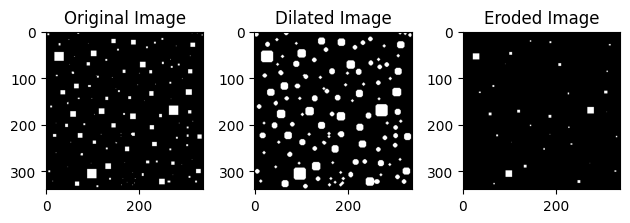

In [15]:
# 膨胀 和 腐蚀
structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype('bool')
# 二值化
binary_image_blocks = binarize_image(image_blocks)
# 膨胀
dilated_image_blocks = dilate(binary_image_blocks, structuring_element, times=3)
# 腐蚀
eroded_image_blocks = erode(binary_image_blocks, structuring_element, times=3)
figure = plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(to_pil_image(binary_image_blocks), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(to_pil_image(dilated_image_blocks), cmap='gray')
plt.title('Dilated Image')
plt.subplot(1, 3, 3)
plt.imshow(to_pil_image(eroded_image_blocks), cmap='gray')
plt.title('Eroded Image')
plt.tight_layout()
plt.show()

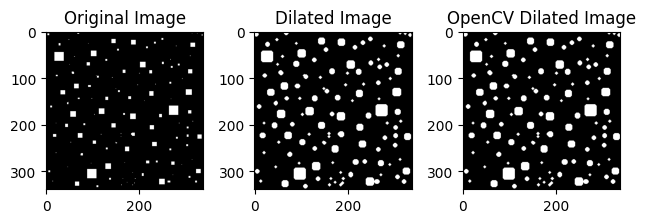

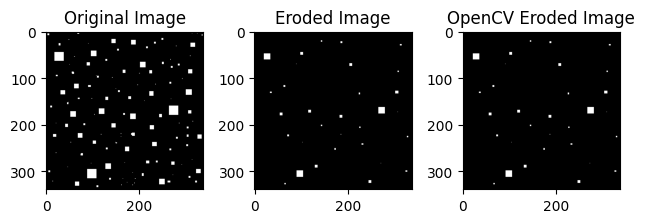

In [16]:
# 展示自行编写的函数与opencv函数的对比
# 膨胀
opencv_dilated_image_blocks = cv2.dilate(binary_image_blocks.astype(np.uint8), structuring_element.astype(np.uint8), iterations=3)
# 腐蚀
opencv_eroded_image_blocks = cv2.erode(binary_image_blocks.astype(np.uint8), structuring_element.astype(np.uint8), iterations=3)
# 将原图 自行编写的图像 以及opencv的图像进行对比
figure = plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(to_pil_image(binary_image_blocks), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(to_pil_image(dilated_image_blocks), cmap='gray')
plt.title('Dilated Image')
plt.subplot(1, 3, 3)
plt.imshow(to_pil_image(opencv_dilated_image_blocks), cmap='gray')
plt.title('OpenCV Dilated Image')
plt.tight_layout()
plt.show()

# 将原图 自行编写的图像 以及opencv的图像进行对比
figure = plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(to_pil_image(binary_image_blocks), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(to_pil_image(eroded_image_blocks), cmap='gray')
plt.title('Eroded Image')
plt.subplot(1, 3, 3)
plt.imshow(to_pil_image(opencv_eroded_image_blocks), cmap='gray')
plt.title('OpenCV Eroded Image')
plt.tight_layout()
plt.show()

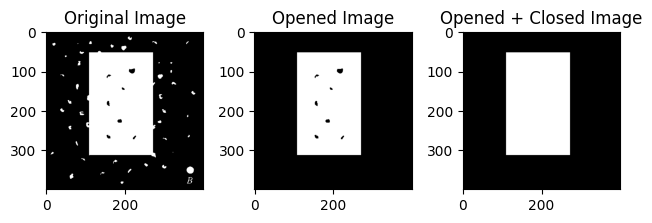

In [17]:
# 对blocks 开运算
# structuring_element = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]).astype('bool')
# 构建一个 9x9 的结构元素 为1
structuring_element = np.ones((7, 7)).astype('bool')
binary_image_finger = binarize_image(image_rectangle)
# 开运算
opened_image = open_image(binary_image_finger, structuring_element, times=3)
# 闭运算
closed_image = close_image(opened_image, structuring_element, times=3)

figure = plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(to_pil_image(binary_image_finger), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(to_pil_image(opened_image), cmap='gray')
plt.title('Opened Image')
plt.subplot(1, 3, 3)
plt.imshow(to_pil_image(closed_image), cmap='gray')
plt.title('Opened + Closed Image')
plt.tight_layout()
plt.show()

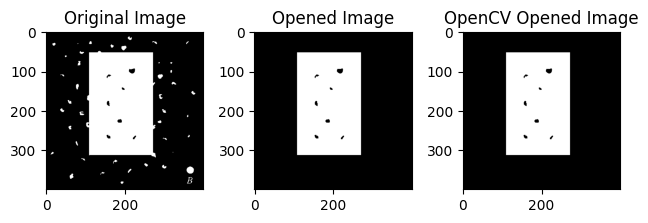

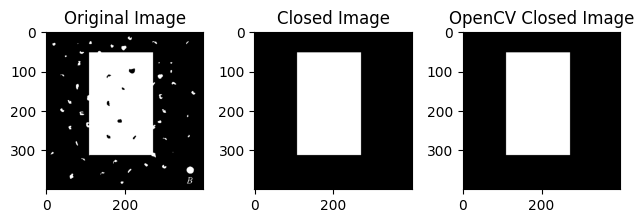

In [18]:
# 展示自行编写的函数与opencv函数的对比
# 开运算
opencv_opened_image = cv2.morphologyEx(binary_image_finger.astype(np.uint8), cv2.MORPH_OPEN, structuring_element.astype(np.uint8), iterations=3)
# 闭运算
opencv_closed_image = cv2.morphologyEx(opencv_opened_image, cv2.MORPH_CLOSE, structuring_element.astype(np.uint8), iterations=3)
figure = plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(to_pil_image(binary_image_finger), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(to_pil_image(opened_image), cmap='gray')
plt.title('Opened Image')
plt.subplot(1, 3, 3)
plt.imshow(to_pil_image(opencv_opened_image), cmap='gray')
plt.title('OpenCV Opened Image')
plt.tight_layout()
plt.show()

# 将原图 自行编写的图像 以及opencv的图像进行对比
figure = plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(to_pil_image(binary_image_finger), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(to_pil_image(closed_image), cmap='gray')
plt.title('Closed Image')
plt.subplot(1, 3, 3)
plt.imshow(to_pil_image(opencv_closed_image), cmap='gray')
plt.title('OpenCV Closed Image')
plt.tight_layout()
plt.show()


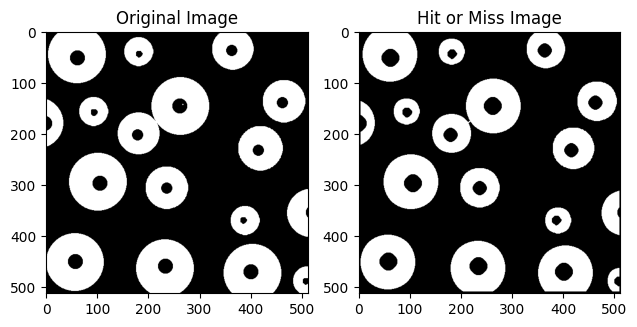

In [19]:
# 击中击不中操作
structuring_element1 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype('bool')
structuring_element2 = np.array([[1, 0, 1], [0, 0, 0], [1, 0, 1]]).astype('bool')
binary_image_region = binarize_image(image_region)
hit_or_miss_image = hit_or_miss(binary_image_region, structuring_element1, structuring_element2, times=3)
figure = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(to_pil_image(binary_image_region), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(to_pil_image(hit_or_miss_image), cmap='gray')
plt.title('Hit or Miss Image')
plt.tight_layout()
plt.show()

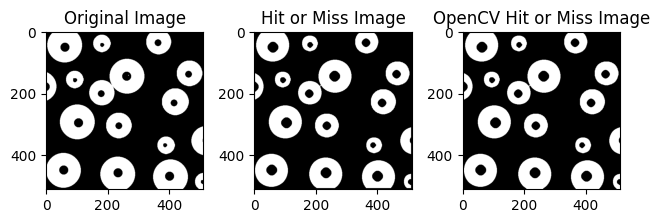

In [20]:
# 展示自行编写的函数与opencv函数的对比
# 击中击不中操作
opencv_hit_or_miss_image = cv2.morphologyEx(binary_image_region.astype(np.uint8), cv2.MORPH_HITMISS, structuring_element1.astype(np.uint8), iterations=3)
figure = plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(to_pil_image(binary_image_region), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(to_pil_image(hit_or_miss_image), cmap='gray')
plt.title('Hit or Miss Image')
plt.subplot(1, 3, 3)
plt.imshow(to_pil_image(opencv_hit_or_miss_image), cmap='gray')
plt.title('OpenCV Hit or Miss Image')
plt.tight_layout()
plt.show()
